#drive

In [1]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#changing the path
import os
os.chdir('/content/drive/MyDrive/interview')

In [3]:
ls

 Resume.csv  'Untitled0 (1).ipynb'   Untitled0.ipynb


In [4]:
#!unzip archive.zip
#!unzip glove.6B.50d.txt.zip
#!unzip glove.6B.300d.txt.
#!unzip glove.6B.100d.txt.zip

#import

In [5]:
#!pip install keras-tuner

In [6]:
#importing all files
import pandas as pd
import numpy as np
import nltk
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Embedding,Dropout,LSTM,Bidirectional,Dense,Conv1D,MaxPooling1D,BatchNormalization,Activation,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from xgboost import XGBRFClassifier
from tensorflow import keras
from sklearn.metrics import classification_report, accuracy_score
#from kerastuner.tuners import RandomSearch
from sklearn.utils import compute_class_weight
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
stopwords=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#Read data

In [7]:
#read the csv
data=pd.read_csv('Resume.csv')
data.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [8]:
data.shape

(2484, 4)

In [9]:
data['Resume_str'][1]

"         HR SPECIALIST, US HR OPERATIONS       Summary     Versatile  media professional with background in Communications, Marketing, Human Resources and Technology.\xa0        Experience     09/2015   to   Current     HR Specialist, US HR Operations    Company Name   －   City  ,   State       Managed communication regarding launch of Operations group, policy changes and system outages      Designed standard work and job aids to create comprehensive training program for new employees and contractors         Audited job postings for old, pending, on-hold and draft positions.           Audited union hourly, non-union hourly and salary background checks and drug screens             Conducted monthly new hire benefits briefing to new employees across all business units               Served as a link between HR Managers and vendors by handling questions and resolving system-related issues         Provide real-time process improvement feedback on key metrics and initiatives  Successfully r

In [10]:
#finding the distribution of all categories
data['Category'].value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

In [11]:
len(data['Category'].value_counts())

24

#Preprocessing

In [12]:
#cleaning the dataset using gensim library
def preprocess(texts):
  texts=texts.lower()
  nltk.tokenize.word_tokenize(texts)
  result=[]
  for word in gensim.utils.simple_preprocess(texts):
    if word not in stopwords and len(word)>3:
      result.append(word)
  return result

In [13]:
#applying the cleaning process
data['tokenized_texts']=data['Resume_str'].apply(preprocess)

In [14]:
#joining the separate words
data['text_joined']=data['tokenized_texts'].apply(lambda x:' '.join(x))

In [15]:
data['text_joined'].head()

0    administrator marketing associate administrato...
1    specialist operations summary versatile media ...
2    director summary years experience recruiting p...
3    specialist summary dedicated driven dynamic ye...
4    manager skill highlights skills department sta...
Name: text_joined, dtype: object

In [16]:
#finding the maximum words for a resume
maxlen=-1
nltk.download('punkt')
for doc in data['text_joined']:
  tokens=nltk.word_tokenize(doc)
  if maxlen<len(tokens):
    maxlen=len(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
print(maxlen)

3374


In [18]:
#encoding the class
data['Category_id']=data.Category.factorize()[0]

In [19]:
data['Category_id']

0        0
1        0
2        0
3        0
4        0
        ..
2479    23
2480    23
2481    23
2482    23
2483    23
Name: Category_id, Length: 2484, dtype: int64

In [20]:
labels,unique=data.Category.factorize()

In [21]:
class_mapping = dict(zip(unique, data["Category"].unique()))

In [22]:
print(class_mapping)

{'HR': 'HR', 'DESIGNER': 'DESIGNER', 'INFORMATION-TECHNOLOGY': 'INFORMATION-TECHNOLOGY', 'TEACHER': 'TEACHER', 'ADVOCATE': 'ADVOCATE', 'BUSINESS-DEVELOPMENT': 'BUSINESS-DEVELOPMENT', 'HEALTHCARE': 'HEALTHCARE', 'FITNESS': 'FITNESS', 'AGRICULTURE': 'AGRICULTURE', 'BPO': 'BPO', 'SALES': 'SALES', 'CONSULTANT': 'CONSULTANT', 'DIGITAL-MEDIA': 'DIGITAL-MEDIA', 'AUTOMOBILE': 'AUTOMOBILE', 'CHEF': 'CHEF', 'FINANCE': 'FINANCE', 'APPAREL': 'APPAREL', 'ENGINEERING': 'ENGINEERING', 'ACCOUNTANT': 'ACCOUNTANT', 'CONSTRUCTION': 'CONSTRUCTION', 'PUBLIC-RELATIONS': 'PUBLIC-RELATIONS', 'BANKING': 'BANKING', 'ARTS': 'ARTS', 'AVIATION': 'AVIATION'}


In [ ]:
#Counting the total unique number of words in the whole datasets
list_of_words=[]
for c in data.tokenized_texts:
  for j in c:
    list_of_words.append(j)
total_words=len(list(set(list_of_words)))
print(total_words)

In [ ]:
wordfreq=nltk.FreqDist(list_of_words)

In [ ]:
#Top 20 words which are used in the maximum in the resume
commonwords=wordfreq.most_common(20)
print(commonwords)

#Exploratory Data Analysis

In [ ]:
#Finding their distribution
sns.countplot(x=data.Category_id,data=data)

In [ ]:
data['text_joined'][data['Category']=='HR']

0      administrator marketing associate administrato...
1      specialist operations summary versatile media ...
2      director summary years experience recruiting p...
3      specialist summary dedicated driven dynamic ye...
4      manager skill highlights skills department sta...
                             ...                        
105    manager business partner summary human resourc...
106    designation assistant professional summary hum...
107    volunteer asst manager professional summary de...
108    specialist horizontal engineer professional su...
109    contact center specialist summary forward thin...
Name: text_joined, Length: 110, dtype: object

 - About 44-48 percent of class are above the 1800 maxlen

In [ ]:
#Choosing the maximum length which are medium in all of the other class
nltk.download('punkt')
for x in data['Category'].unique():
  tokenizer=Tokenizer()
  tokenizer.fit_on_texts(data['text_joined'][data['Category']==x])
  word_tokenize=tokenizer.word_index
  #print("Class {}: tokenizer {}".format(x,len(word_tokenize)))
  maxlen=-1
  for doc in data['text_joined'][data['Category']==x]:
    tokens=nltk.word_tokenize(doc)
    if maxlen<len(tokens):
      maxlen=len(tokens)
  if maxlen>=1800:
    print("Class {}: tokenizer {} maxlen {}".format(x,len(word_tokenize),maxlen))

  #print(len(word_tokenize))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Class HR: tokenizer 5754 maxlen 2213
Class INFORMATION-TECHNOLOGY: tokenizer 7221 maxlen 1877
Class ADVOCATE: tokenizer 7044 maxlen 1857
Class HEALTHCARE: tokenizer 7135 maxlen 1952
Class DIGITAL-MEDIA: tokenizer 6501 maxlen 2218
Class CHEF: tokenizer 6357 maxlen 3374
Class FINANCE: tokenizer 6117 maxlen 1858
Class ACCOUNTANT: tokenizer 5771 maxlen 2098
Class CONSTRUCTION: tokenizer 7427 maxlen 2724
Class PUBLIC-RELATIONS: tokenizer 7379 maxlen 3347


#Train test split

In [24]:
#Spliting the class with balancing the class ratio using stratify for their imbalance class
x_train,x_test,y_train,y_test=train_test_split(data.text_joined,data.Category_id,test_size=.2,stratify=data.Category_id,random_state=42)

In [ ]:
x_train

590     senior business development manager executive ...
440     advocate summary depth knowledge taking orders...
891     operations associate lisa phinney skills licen...
1622    product photographer summary enthusiastic phot...
1025    sales manager territory sales manager experien...
                              ...                        
1541    director finance executive profile senior fina...
1591    finance operations manager summary dedicated a...
582     founder business development director skills s...
1377    head chef summary mature college student inter...
1030    sales consultant summary current sophomore maj...
Name: text_joined, Length: 1987, dtype: object

In [25]:
x_test.to_csv('test_data.csv',index=False)

In [26]:
y_test.to_csv('y_label.csv',index=False)
#index=False)

#Tokenization

In [27]:
#total 20000 uniques will be use as a vocab size for the classifying the resume
tokenizer=Tokenizer(num_words=20000)
tokenizer.fit_on_texts(x_train)
train_sequence=tokenizer.texts_to_sequences(x_train)
test_sequence=tokenizer.texts_to_sequences(x_test)

In [28]:
#Storing the tokenizer for the future use
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w') as json_file:
    json_file.write(tokenizer_json)

In [29]:
#padding the length of the each resume
padded_train=pad_sequences(train_sequence,maxlen=1800,padding='post')
padded_test=pad_sequences(test_sequence,maxlen=1800,padding='post')

In [ ]:
y_train

array([ 2, 18, 20, ...,  7, 16,  5])

In [33]:
#For maintaing the class ratio in the validation data while choosing in the training time
class_weights = compute_class_weight('balanced',classes=np.unique(data.Category_id), y=y_train)
class_weight_dict =  dict(enumerate(class_weights))

In [ ]:
word_index=tokenizer.word_index
len(word_index)

30131

In [ ]:
#extracting the vector of the words from txt file
embedding_index={}
with open('glove.6B.100d.txt','r') as glove_file:
  for line in glove_file:
    values=line.split()
    word=values[0]
    coefs=np.array(values[1],dtype='float32')
    embedding_index[word]=coefs

In [ ]:
#selecting the word for using as a weight in the training model for the vocab words
embedding_matrix=np.zeros((20000,100))
for word,i in word_index.items():
  if i>19999:
    continue
  embedding_vectorized=embedding_index.get(word)
  if embedding_vectorized is not None:
    embedding_matrix[i]=embedding_vectorized

In [ ]:
padded_train.shape,padded_test.shape

((1987, 450), (497, 450))

#Model

In [ ]:
# model=Sequential()
# model.add(Embedding(3000,16,input_length=240))
# # model.add(Conv1D(64,3,kernel_initializer='he_uniform'))
# model.add(Bidirectional(LSTM(50)))
# #model.add(Bidirectional(LSTM(64,return_sequences=True)))
# # model.add(Dropout(.5))

# # model.add(BatchNormalization())
# # model.add(Activation('relu'))
# # #model.add(Dropout(.5))

# model.add(BatchNormalization())
# model.add(Activation('relu'))
# # #model.add(Dropout(.5))
# model.add(Flatten())
# model.add(Dense(108,activation='relu',kernel_initializer='he_uniform'))
# # model.add(Dropout(.25))
# # model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
# # model.add(Dropout(.5))
# model.add(Dense(24,activation='softmax'))

In [ ]:
#early stopping the training for the poor validation loss
early_stopping = EarlyStopping(monitor='val_acc', patience=30, restore_best_weights=True)

In [30]:
#store the best model
callback= [EarlyStopping(monitor='val_acc', patience=100),
             ModelCheckpoint(filepath='model/model.epoch{epoch:02d}-acc{val_acc:.4f}.hdf5', monitor='val_acc', save_best_only=True,mode='max')]

In [31]:
import tensorflow as tf
model=tf.keras.Sequential([
                           tf.keras.layers.Embedding(20000,0,input_length=1800),#,weights=[embedding_matrix],trainable=False),#trainable=False
                           tf.keras.layers.Bidirectional(LSTM(100,return_sequences=True)),
                           #tf.keras.layers.Bidirectional(LSTM(100,return_sequences=True)),
                           #tf.keras.layers.GlobalAveragePooling1D(),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(100,activation='relu'),#,kernel_regularizer=tf.keras.regularizers.l1(l=.002)
                           #tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Dropout(.5),
                           tf.keras.layers.Dense(100,activation='relu'),
                           #tf.keras.layers.BatchNormalization(),
                           #tf.keras.layers.Dropout(.5),
                          #  tf.keras.layers.Dense(50,activation='relu'),
                          #  tf.keras.layers.BatchNormalization(),
                           #tf.keras.layers.Dropout(.5),
                          #  tf.keras.layers.Dense(200,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l=.02)),
                          #  tf.keras.layers.BatchNormalization(),
                          # tf.keras.layers.Dropout(.5),
                           tf.keras.layers.Dense(24,activation='softmax')

])
opt=tf.keras.optimizers.Adam(lr=.0001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1800, 50)          1000000   
                                                                 
 bidirectional (Bidirectiona  (None, 1800, 200)        120800    
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 360000)            0         
                                                                 
 dense (Dense)               (None, 100)               36000100  
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                        

In [34]:
history=model.fit(padded_train,y_train,validation_split=.2,class_weight=class_weight_dict,batch_size=32,epochs=1000,callbacks=[callback])

Epoch 1/1000
50/50 [==============================] - 30s 396ms/step - loss: 3.2576 - acc: 0.0409 - val_loss: 3.1793 - val_acc: 0.0503
Epoch 2/1000
50/50 [==============================] - 20s 393ms/step - loss: 3.1576 - acc: 0.0510 - val_loss: 3.1463 - val_acc: 0.0678
Epoch 3/1000
50/50 [==============================] - 18s 357ms/step - loss: 3.0443 - acc: 0.1070 - val_loss: 3.0353 - val_acc: 0.0653
Epoch 4/1000
50/50 [==============================] - 17s 337ms/step - loss: 2.7405 - acc: 0.1857 - val_loss: 2.7003 - val_acc: 0.2940
Epoch 5/1000
50/50 [==============================] - 19s 376ms/step - loss: 2.0472 - acc: 0.3682 - val_loss: 2.0694 - val_acc: 0.4095
Epoch 6/1000
50/50 [==============================] - 19s 370ms/step - loss: 1.4335 - acc: 0.5488 - val_loss: 1.9003 - val_acc: 0.4698
Epoch 7/1000
50/50 [==============================] - 17s 338ms/step - loss: 0.7614 - acc: 0.7464 - val_loss: 1.8150 - val_acc: 0.5226
Epoch 8/1000
50/50 [==============================] - 1

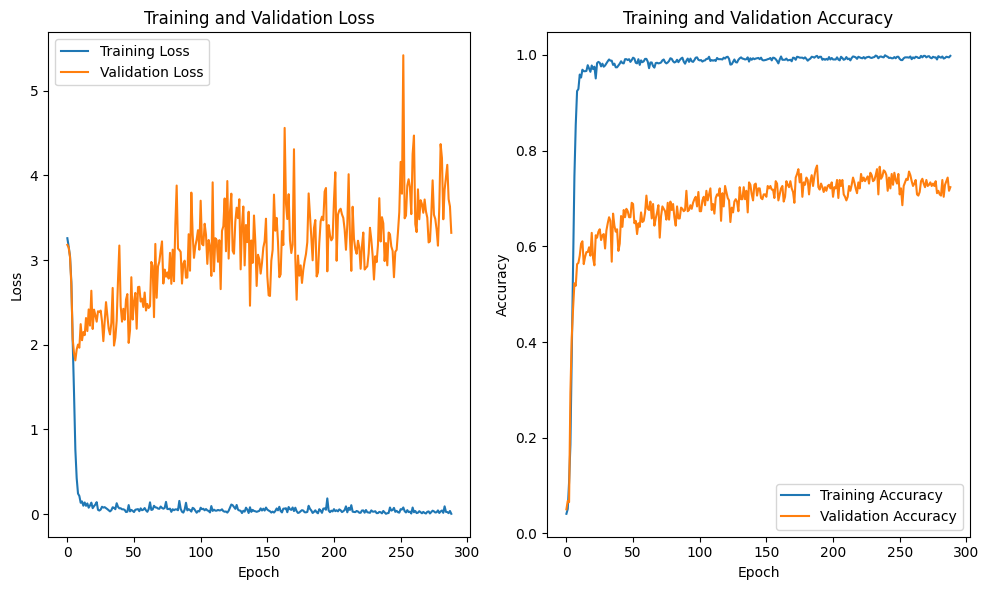

In [35]:
plt.figure(figsize=(10, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#Predicting the test data

In [36]:
y_predict=model.predict(padded_test)

16/16 [==============================] - 1s 48ms/step


In [37]:
result=[]
for i in range(y_predict.shape[0]):
    pred= np.argmax(y_predict[i])
    result.append(pred)

In [38]:
predict = pd.DataFrame()
predict["label"] = result

predict.head()

,label
0,5
1,14
2,11
3,18
4,10


In [40]:
class_names=['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE', 'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE', 'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE', 'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT', 'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS','AVIATION']

#Classfication Report of the model

In [42]:
report=classification_report(y_test,predict,target_names=class_names)
print(report)

                        precision    recall  f1-score   support

                    HR       0.67      0.64      0.65        22
              DESIGNER       0.95      1.00      0.98        21
INFORMATION-TECHNOLOGY       0.77      0.83      0.80        24
               TEACHER       0.67      1.00      0.80        20
              ADVOCATE       0.94      0.67      0.78        24
  BUSINESS-DEVELOPMENT       0.50      1.00      0.67        24
            HEALTHCARE       0.67      0.61      0.64        23
               FITNESS       0.80      0.67      0.73        24
           AGRICULTURE       0.44      0.31      0.36        13
                   BPO       0.00      0.00      0.00         4
                 SALES       0.51      0.91      0.66        23
            CONSULTANT       0.88      0.91      0.89        23
         DIGITAL-MEDIA       0.45      0.74      0.56        19
            AUTOMOBILE       0.00      0.00      0.00         7
                  CHEF       1.00      

###tuner for finding optimal dense units for the model

In [ ]:
# def build_model(hp):
#   model=keras.Sequential()
#   model.add(Embedding(5000,300,input_length=450,weights=[embedding_matrix],trainable=False))
#   model.add(tf.keras.layers.GlobalAveragePooling1D())
#   for i in range(hp.Int('n_layers', 1, 4)):
#     model.add(Dense(units=hp.Int(f'dense_units_{i}',min_value=48,max_value=200,step=12)))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))

#   model.add(Dense(24,activation='softmax'))
#   model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),metrics=['accuracy'])
#   return model

In [43]:
#tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=20,executions_per_trial=1,directory='/content/drive/MyDrive/interview',project_name='j')

In [44]:
#tuner.search(padded_train,y_train,validation_data=(padded_test,y_test),batch_size=64,epochs=100)